# 1 answer

In [8]:
from google.colab import drive

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

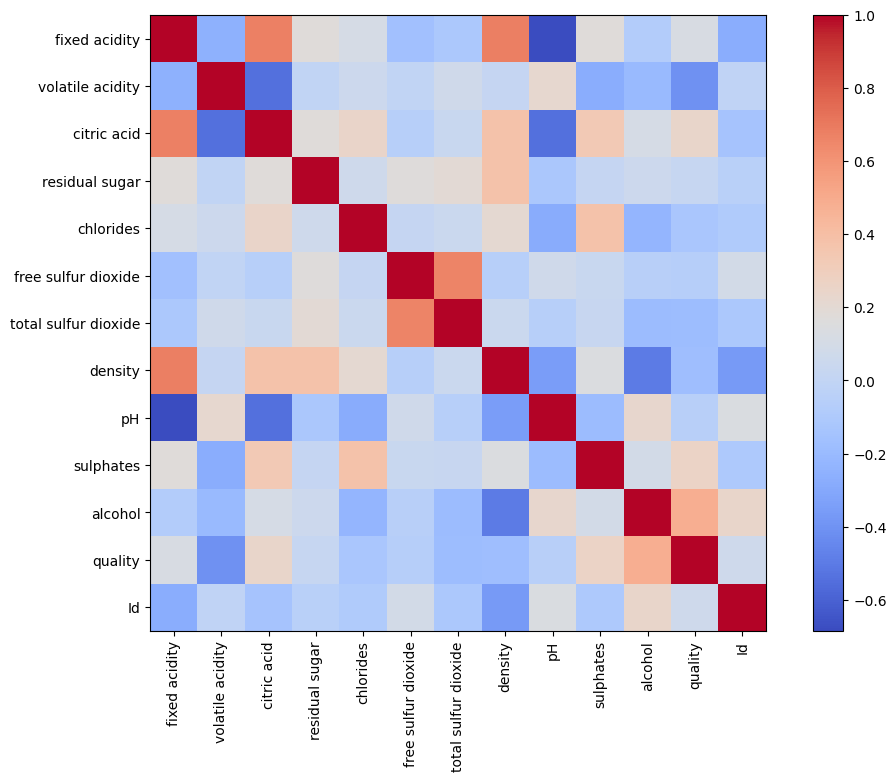

Mean Squared Error: 0.38242835212918513


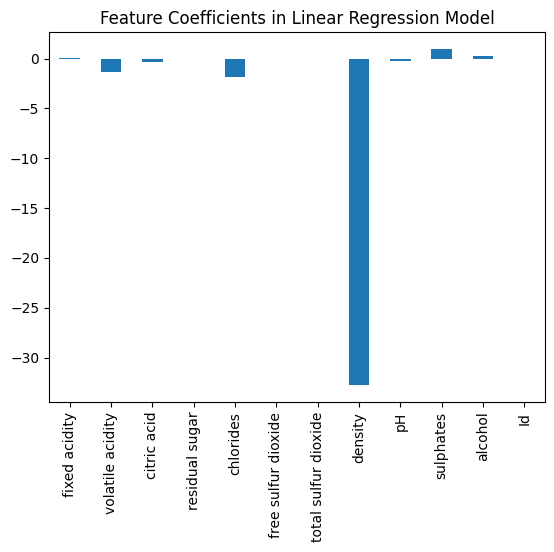

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
wine_data = pd.read_csv("/content/WineQT.csv")

print(wine_data.head())

print(wine_data.describe())

correlation_matrix = wine_data.corr()
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(wine_data.columns)), wine_data.columns, rotation=90)
plt.yticks(range(len(wine_data.columns)), wine_data.columns)
plt.show()

X = wine_data.drop(columns=["quality"])
y = wine_data["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

coefficients = pd.Series(model.coef_, index=X.columns)
coefficients.plot(kind='bar')
plt.title("Feature Coefficients in Linear Regression Model")
plt.show()


# 2 answer

1.  Deletion of Missing Data (Dropping Rows or Columns):

@. Advantages:

Simple and quick.
Preserves data integrity if missing values are not widespread.

@. Disadvantages:

Loss of valuable data.
May lead to biased results if missingness is not random.

In [23]:
# Drop rows with missing values
wine_data.dropna(axis=0, inplace=True)

# Drop columns with missing values
wine_data.dropna(axis=1, inplace=True)


2. Mean or Median Imputation:

@ Advantages:
Simple and quick.
Preserves the data distribution.


@ Disadvantages:
Ignores relationships between features.
May introduce bias if missingness is not random.

In [25]:
# Replace missing values in a specific column with the mean
wine_data['column_name'].fillna(wine_data['column_name'].mean(), inplace=True)

# Replace missing values in a specific column with the median
wine_data['column_name'].fillna(wine_data['column_name'].median(), inplace=True)


3. Mode Imputation (for Categorical Data)

@. Advantages:

Applicable to categorical data.
Simple and quick.

@. Disadvantages:

Same as mean/median imputation regarding bias.

In [ ]:
# Replace missing values in a specific column with the mode
wine_data['column_name'].fillna(wine_data['column_name'].mode()[0], inplace=True)


4. Regression Imputation:

@ Advantages:

Captures relationships between features.
Provides more accurate imputations when strong relationships exist.

@ Disadvantages:

Computationally intensive.
Sensitive to outliers and multicollinearity.

In [26]:
from sklearn.linear_model import LinearRegression

# Split the dataset into two parts: one with missing values and one without
missing_data = wine_data[wine_data['column_name'].isna()]
non_missing_data = wine_data[~wine_data['column_name'].isna()]

# Create a regression model to predict missing values
model = LinearRegression()
model.fit(non_missing_data[['feature1', 'feature2']], non_missing_data['column_name'])
predicted_values = model.predict(missing_data[['feature1', 'feature2']])

# Fill missing values with predicted values
wine_data.loc[missing_data.index, 'column_name'] = predicted_values


5. K-Nearest Neighbors (K-NN) Imputation:

@ Advantages:

Considers data similarity.
Applicable to both numerical and categorical data.

@ Disadvantages:

Computationally expensive for large datasets.
Performance depends on the choice of n_neighbors.


In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
wine_data_imputed = imputer.fit_transform(wine_data)
wine_data_imputed = pd.DataFrame(wine_data_imputed, columns=wine_data.columns)


6. Multiple Imputation:

@ Advantages:

Captures uncertainty by generating multiple imputed datasets.
Suitable for complex missing data patterns.
@ Disadvantages:

Computationally intensive.
Requires specifying a model for imputation.

In [5]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=0)
wine_data_imputed = imputer.fit_transform(wine_data)
wine_data_imputed = pd.DataFrame(wine_data_imputed, columns=wine_data.columns)

# 3 answer
Several factors can affect students' performance in exams, and understanding these factors is essential for educational institutions to provide effective support and interventions. Some key factors that influence student performance include:

1. Study Habits: Effective study habits, including time management, note-taking, and active learning strategies, can significantly impact exam performance.

2. Attendance: Regular attendance in classes and engagement with course materials can lead to better understanding and retention of the subject matter.

3. Prior Knowledge: Students' prior knowledge of the subject and their foundational skills in related areas can affect their ability to grasp new concepts.

4. Motivation: Intrinsic motivation, such as a genuine interest in the subject matter, and extrinsic motivation, such as the desire for good grades, can influence effort and performance.

5. Teacher Quality: The quality of teaching and the effectiveness of instructors play a vital role in students' learning experiences and outcomes.

6. Peer Influence: Interactions with peers can either support or distract from studying and learning.

7. Family Background: Socioeconomic status, parental education, and family support can impact access to educational resources and support.

8. Health and Well-being: Physical and mental health, including stress levels, can affect cognitive functioning and focus.

# To analyze these factors using statistical techniques in Python, you can follow these steps:

1. Data Collection: Gather relevant data on students' performance and the potential factors that influence it. This data can be obtained through surveys, academic records, teacher assessments, and other sources.

2. Data Preprocessing: Clean and preprocess the data, handling missing values, outliers, and categorical variables as needed.

3. Exploratory Data Analysis (EDA): Conduct EDA to understand the relationships between the factors and student performance. Use statistical techniques and visualization libraries like pandas, numpy, seaborn, and matplotlib to generate summary statistics, scatter plots, histograms, and correlation matrices.

4. Hypothesis Testing: Formulate hypotheses about the factors affecting student performance and conduct statistical tests to assess the significance of these factors. You can use t-tests, ANOVA, or regression analysis, depending on the nature of the data.

For example, you can use a regression model to examine the impact of study hours, attendance, and prior knowledge on exam scores:

5. Machine Learning Models: Utilize machine learning models, such as decision trees, random forests, or logistic regression, to predict student performance based on the identified factors. You can use libraries like scikit-learn for this purpose.

6. Model Evaluation: Assess the performance of your predictive models using appropriate metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), or classification accuracy, depending on the nature of the problem.

7. Visualization: Visualize the results of your analysis using plots, charts, and graphs to communicate your findings effectively. Libraries like matplotlib and seaborn can help create informative visualizations.

8. Interpretation: Interpret the results of your analysis to draw meaningful conclusions about the factors influencing student performance. Identify which factors have the most significant impact.

9. Recommendations: Based on your analysis, provide recommendations to educational institutions or policymakers on strategies to improve student performance, such as enhancing teaching methods, providing additional support, or addressing specific challenges.

# 4 answer

1. Initial Data Understanding:

Begin by loading the dataset and understanding its structure. In Python, you can use the pandas library to read the dataset and inspect its basic characteristics:

2. Feature Selection:

Review the dataset to identify potential features that could influence student performance. Common features in this dataset may include student demographics, family background, study habits, and previous academic performance.
Decide on the target variable you want to predict. In this case, it could be a measure of student performance, such as final grades or exam scores.
3. Data Cleaning:

Check for missing values in the dataset and decide how to handle them. You can use the fillna method to replace missing values with appropriate values (e.g., mean, median, mode) or drop rows or columns with too many missing values.

4. Feature Transformation:

Convert categorical variables into numerical format using techniques like one-hot encoding or label encoding. In Python, you can use libraries like pandas or scikit-learn for this purpose.

5. Feature Engineering Techniques:

Consider applying polynomial features or interaction terms if you suspect non-linear relationships or interactions between variables.

6. Validation and Model Building:

Split the dataset into training and testing sets to evaluate the impact of feature engineering on model performance.

7. Model Evaluation:

Evaluate the performance of your models using appropriate metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), or accuracy, depending on the type of problem (regression or classification).
8. Iterative Process:

Feature engineering is often an iterative process. You may need to revisit and refine your feature engineering steps based on model performance and domain knowledge.
9. Interpretation:

After selecting the best model and features, interpret the model results to understand which factors have the most significant impact on student performance. Visualizations and feature importance analysis can aid in interpretation.


In [30]:
import pandas as pd


student_data = pd.read_csv("/content/student_data.csv")

print(student_data.info())

student_data['age'].fillna(student_data['age'].median(), inplace=True)

student_data = pd.get_dummies(student_data, columns=['gender', 'Fjob'])
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
student_data[['math_score', 'reading_score']] = scaler.fit_transform(student_data[['math_score', 'reading_score']])
# Create a new feature 'total_study_time' by summing study time for each subject
student_data['total_study_time'] = student_data['study_time'] + student_data['study_time']
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5 answer

1. Load the Wine Quality Dataset:

First, make sure you have the Wine Quality dataset (either the red or white wine dataset) in a CSV file, and then load it into a pandas DataFrame.

2. Exploratory Data Analysis (EDA):

Now, let's perform EDA to explore the distribution of each feature and identify non-normality:

3. Identifying Non-Normal Features:

During the EDA process, observe the histograms and look for features that exhibit non-normality. Non-normal features typically have skewed or asymmetrical distributions, which can be seen as deviations from the bell-shaped curve.

4. Transformations to Improve Normality:

If you identify non-normal features, consider applying transformations to make their distributions closer to normal (Gaussian) distributions. Common transformations include:

Log Transformation: Use the logarithm (natural or base 10) to compress the range of values for positively skewed features.

Square Root Transformation: This can be effective for reducing the impact of outliers and making the distribution more symmetrical.

Box-Cox Transformation: The Box-Cox transformation is a family of power transformations that can handle different types of non-normality

ValueError: ignored

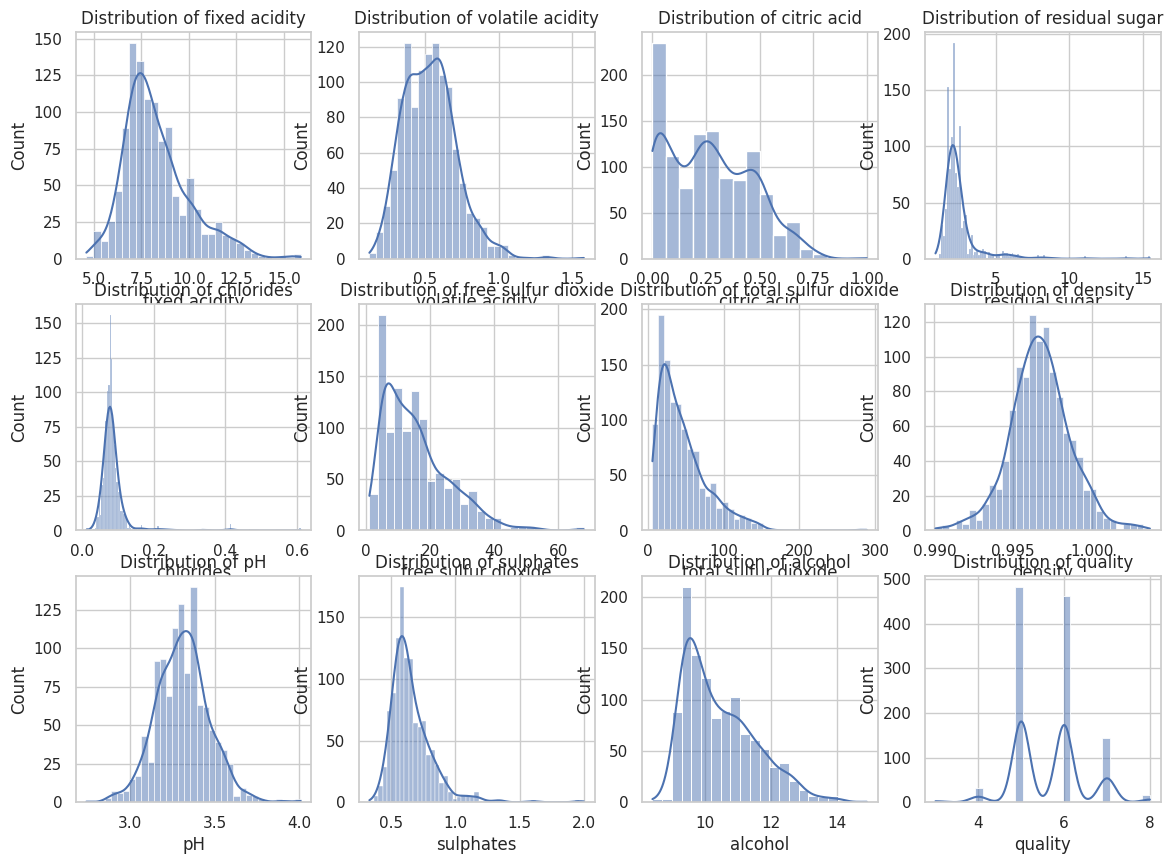

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

wine_data = pd.read_csv("/content/WineQT.csv")

non_normal_features = []

sns.set(style="whitegrid")

plt.figure(figsize=(14, 10))

for i, column in enumerate(wine_data.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(wine_data[column], kde=True)
    plt.title(f"Distribution of {column}")

    _, p_value = stats.shapiro(wine_data[column])
    alpha = 0.05
    if p_value < alpha:
        non_normal_features.append(column)

plt.tight_layout()
plt.show()

print("Non-normal features:", non_normal_features)


# 6 answer


Number of components for 90% variance explained: 6


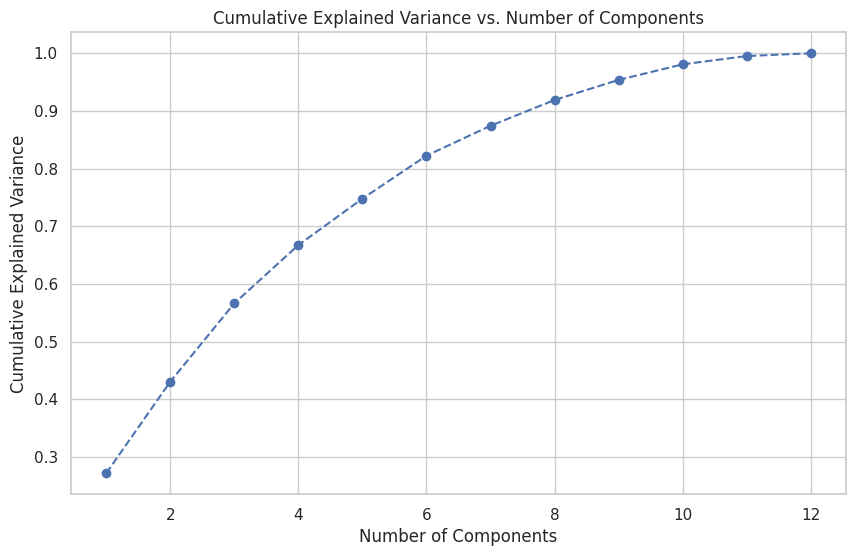

In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

wine_data = pd.read_csv("/content/WineQT.csv")

X = wine_data.drop(columns=['quality'])

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_std)

explained_variance_ratio = pca.explained_variance_ratio_

cumulative_explained_variance = explained_variance_ratio.cumsum()


n_components_90 = (cumulative_explained_variance >= 0.90).sum() + 1

print(f"Number of components for 90% variance explained: {n_components_90}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()
